# Machine Learning: Classification

First, we plug in the libraries we will want to use in this notebook. They are our usual libraries, plus one used for calculating cosine similarity as our measure of distance, and one that lets us plot in 3D.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.spatial.distance as sp
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Toy Data

In this section, we define and plot some toy data. We'll use this data to demonstrate how to implement the algorithms we will be learning. You can use the code in these cells to inspire your code for the class data we will be working on!

We begin by inputting our data in an array. An array is a rectangular block with numbers. In this case, each row corresponds to a person and each column to a film. The number in row 4 and column 2 corresponds to the score (out of 5) given by person 4 to movie 2.

In [4]:
# List the names of the films for plotting purposes

films = ['Into the Spider Verse',       # Film 1
         'Avengers: Endgame',           # Film 2
         'Spider-Man: Homecoming',      # Film 3
         'The Greatest Showman']        # Film 4

# Input scores for each film for each user (out of 5). 
# Missing data is indicated with a 0. Each row of the array corresponds to a user and each column is a different film.

data = np.array([[4.,4.,1.,3.],  # Micah 
                 [5.,4.,2.,1.],  # Jaycee 
                 [2.,2.,4.,3.],  # Seleste 
                 [2.,1.,3.,5.],  # Emeke 
                 [5.,0.,0.,2.]]) # Carlette

We begin by plotting a scatterplot of each individual's score for two of the films. By default, we plot Into the Spider Verse vs Avengers: Endgame scores. You can change the films used in the plot by changing a and b! Try looking at a few. Can you see any patterns? Which pairs of variables lead to more obvious groups? Be sure to record your answer in a markdown cell, so you can look back later.

The code below plots the rankings given by all users for two different movies, plotting their rankings as coordinate pairs - that is, their ranking for movie 1 is plotted as an x-coordinate and their ranking for movie 2 is plotted as the y-coordinate.

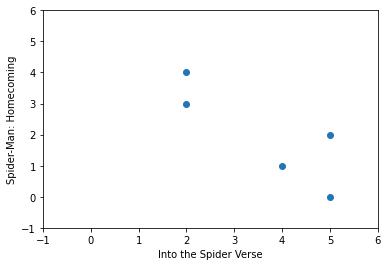

In [5]:
a = 0 # film on x-axis
b = 2 # film on y-axis

fig1 = plt.figure()                  # Initializes the plot
plt.plot(data[:,a],data[:,b],'o')    # Plots all rows in column `a` from the data on the x-axis, 
                                     # plots all rows in column `b` from the data on the y-axis.
plt.axis([-1,6,-1,6])                # Sets the axis limit in both x and y directions
plt.xlabel(films[a])                 # Add axis labels
plt.ylabel(films[b])
plt.show()                           # Actually shows the plot

Notice how in these plots, some data seem closer together than others? We would like to quantify that. For example, for a given new point, how far away is it from the others? Consider two people who have scored both Into the Spider Verse and Spider-Man: Homecoming - Micah and Jaycee - and the scores they gave. 

We can think about the distance between these two people (in Spider Verse - Homecoming space) like the distance between those two points (4,1) and (5,2)! We can calculate the distance between two points using the Pythagorean theorem. We find the difference between their Spider Verse scores and square it and the difference between their Homecoming scores and square it. Then we add them up and take the square root!

Remember, we can get a specific value from the dataframe by using indices - i.e., we use `data[user, movie]` to get a specific user's ranking of a particular movie. So, if we want Micah's rating of Spider Verse, since Micah is in the 0th row (user 0) and Spider Verse is the 0th column (movie 0), we use `data[0,0]`.

Use the Pythagorean theorem to calculate the distance: 

In [6]:
distance = ((data[0,0]-data[1,0])**2. + (data[0,2]-data[1,2])**2.)**(1./2.)
print(distance)

1.4142135623730951


Use the cell below to calculate the Spider Verse - Homecoming difference between Micah and every other individual who has seen both movies. Use "computational thinking" to make it easy for you to change *who* is being compared and *which movies* are being used in the comparison!

Note that we came up with a bunch of different ways this could work, using computational thinking. We could use for loops, functions, or just define the user and movie outside of an inline command so we can easily change users and movies. 

Option 1: functions. Here are two possibilities: one specifies both users (`distfunc`), so we could compute distances between someone other than Micah and the other users. The second assumes Micah is always our first user (`distfunc_micah`), so we don't need to have a user1 input.

In [7]:
def distfunc(user1, user2, movie1, movie2):
    return ((data[user1,movie1]-data[user2,movie1])**2. + (data[user1,movie2]-data[user2,movie2])**2.)**(1./2.)
# Assumes both users and movies can be chosen

In [8]:
def distfunc_micah(user2, movie1, movie2):
    return ((data[0,movie1]-data[user2,movie1])**2. + (data[0,movie2]-data[user2,movie2])**2.)**(1./2.)
# Assumes Micah is always our first user, so we replace user1 from `distfunc` with a 0 (since Micah is in row 0) 
# to specify that we are only looking at Micah's rankings for user1

In [9]:
distfunc(0,2,0,2)  #Compares Micah's rankings of Spider Verse and Homecoming to Seleste's rankings

3.605551275463989

In [10]:
distfunc_micah(2,0,2)   
# Does the same as `distfunc` in the line above, but Micah is always the first user (i.e., comparison always includes Micah)
# Note that our distances are the same, as they should be!

3.605551275463989

Option 2: Specify movies and users outside of the basic Pythagorean theorem distance calculation. We will go through by hand and alter the value associated with movie1, movie2, and user if we want to compare different movies or change who we are comparing to Micah. This is the least efficient method, but still more efficient than manually changing the indices in our `distance` commmand!

In [11]:
movie1 = 0
movie2 = 2
user = 1
((data[0,movie1]-data[user,movie1])**2. + (data[0,movie2]-data[user,movie2])**2.)**(1./2.)

1.4142135623730951

Option 3: using for loops to run through all other users. This is arguably the most efficient. Note that we can nest loops - that is, if we want to also run through all combinations of movies, we could create another loop to run through the different movies and 'nest' the loop below inside of it to run through the different users (we definitely don't need to do this - this is just to let you know it's possible!).

In [12]:
movie1 = 0    #Specify which movies we are comparing
movie2 = 2
moviedistances = np.zeros(len(data)) # create a list where we will save the distance between Micah and each other user
for i in np.arange(len(data)): # for each person in the toy dataset `data`
        moviedistances[i] = ((data[0,movie1]-data[i,movie1])**2. + (data[0,movie2]-data[i,movie2])**2.)**(1./2.)  
        #^^ Calculates the distance between user `i` and Micah
print(moviedistances)   #Print the distance between Micah and every other user for the given two movies

[0.         1.41421356 3.60555128 2.82842712 1.41421356]


We can also plot in three dimensions! Try plotting a scatterplot of preferences for three different films.

We can plot the rankings again as coordinate triples - instead of a coordinate pair `(x, y)`, we have the triple `(x, y, z)`.

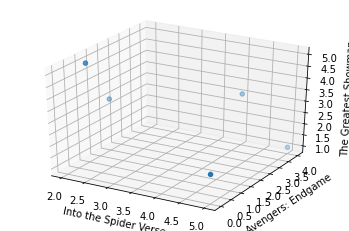

In [13]:
x = 0 # film on x-axis
y = 1 # film on y-axis
z = 3 # film on z-axis

fig2 = plt.figure()                                # Initialize the figure
ax = fig2.add_subplot(111, projection='3d')        # This will let us plot in 3D
ax.scatter(data[:,x], data[:,y], data[:,z])        # Create a scatter plot, plotting all rankings for movie x on the x-axis,
                                                        # all rankings for movie y on the y-axis, and the same for the z-axis.
ax.set_xlabel(films[x])                            # Add axis labels
ax.set_ylabel(films[y])
ax.set_zlabel(films[z])
plt.show()

Again, some points seem _closer_ to one another than others in this 3D plot. How would we capture that? We only have the Pythagorean Theorem for two dimensions. It turns out the distance we use in 2D can be pretty easily translated into 3 dimensions (or more)! If we want to know the distance between Micah and Jaycee in the Spider Verse - Endgame - Homecoming space, we do the following:
* Take the difference between their Spider Verse scores and square it
* Take the difference between their Endgame scores and square it
* Take the difference between their Homecoming scores and square it
* Add up all the results and take the square root!

For example, we can calculate the Spider Verse (0) - Endgame (1) - The Greatest Showman (3) distance between Micah (0) and Emeke (3) by running:

In [14]:
distance = np.sqrt(sum((data[0,[0,1,3]] - data[3,[0,1,3]])**2.))
print(distance)

4.123105625617661


Note that by using `data[user, [movie1, movie2, movie3]]`, we can take the subset of movies that we want and Python will take the differences between our two users for all three different movies and sum them. In other words, it lets us condense the code below:

In [15]:
np.sqrt((data[0,0] - data[3,0])**2. + (data[0,1] - data[3,1])**2. + (data[0,3] - data[3,3])**2.)

4.123105625617661

Again, the two codes above give the same output. The first is more efficient and easier for us, but they're ultimately doing the same thing. 

Calculate the distance between Micah and every other person who has seen Spider Verse, Endgame, and The Greatest Showman. You can again try to use "computational thinking" to make it easy to indicate which people and movies you are comparing!

In [16]:
def distfunc3d(user1, user2, movie1, movie2, movie3):
    return np.sqrt(sum((data[user1,[movie1, movie2, movie3]] - data[user2,[movie1, movie2, movie3]])**2))

Similarly to our 2D distance function, I just add a third movie to compare and use my code from above, where we generalize the users and movies we are comparing. Again, by calling on a subset of the columns instead of explicitly typing out each column I want to compare, I can make my code more efficient.

In [17]:
distfunc3d(0,2,0,1,2)       #Compares Micah's ratings of Spider Verse, Endgame, and Homecoming to Seleste's ratings
        # Note this is the same as the other two options immediately above.

4.123105625617661

We could also use for loops here as well - just like with comparing 2 movies. 

## Our Data

We are going to work with our own movie recommendations! First, we should input the data we produced so we have something to work with. Fill in the data below:

In [18]:
our_films = ['Black Panther',  # film 0
             'Zootopia',  # film 1
             'Inside Out',  # film 2
             'The Incredibles',  # film 3
             'Lion King',  # film 4
             'Toy Story',  # film 5
             'Parasite',  # film 6
             'Chicken Little',  # film 7
             'Inception',  # film 8
             'Avatar'   # film 9
                     ]

people = ['person0',  # Jenny
          'person1',  # Jeremiah
          'person2',  # Joey
          'person3',  # Daud
          'person4',  # Brandon
          'person5',  # Tay
          'person6',  # Seila
          'person7',  # Mylinh
          'person8',  # Ivan
          'person9',  # Celina
          'person10', # Kenny
          'person11', # Andy
          'person12'  # Nora
         ]




our_data = np.array([[3,4,3,0,4,0,0,0,0,0],#person0 -Jenny
                     [5,4,5,5,3,5,0,0,5,1],#person1 -Jeremiah
                     [4,1,2,2,3,3,0,5,4,2],#person2 -Joey
                     [5,0,0,0,0,0,5,0,0,5],#person3 -Daud
                     [4,2,0,5,5,3,0,5,0,0],#person4 -Brandon
                     [5,2,4,4,5,5,3,4,5,5],#person5 -Tay
                     [5,3,0,3,2,4,4,0,0,0],#person6 - Seila
                     [1,0,0,0,0,0,0,0,0,0],#person7 - Mylinh
                     [4,0,0,5,5,5,0,5,4,2],#person8 - Ivan
                     [4,5,4,5,4,5,5,2,0,3],#person9 - Celina
                     [3,3,3,4,0,0,4,0,0,0],#person10 - Kenny
                     [0,3,2,0,0,3,4,0,0,5],#person11 - Andy
                     [5,0,2,3,4,1,5,2,4,2]])#person12 - Nora

Pick two films that you have seen. Plot the data from our class in 2D as we did with the toy data. Try with different choices of films for your axes! Can you see any clusters as you change the variables you plot? Record your answers in the lab worksheet.

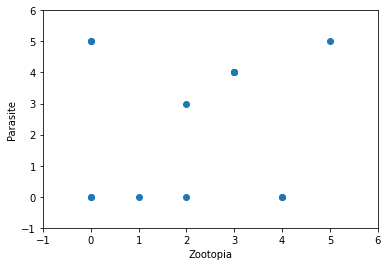

In [37]:
a = 1      # movie 1
b = 6      # movie 2

our_fig1 = plt.figure()                       # Initialize the figure
plt.plot(our_data[:,a],our_data[:,b],'o')     # Plot all user's rankings of movies a and b
plt.axis([-1,6,-1,6])                         # Set the axis limits
plt.xlabel(our_films[a])                      # Add axis labels
plt.ylabel(our_films[b])
plt.show()

Choose two films that you have seen. Calculate the distance between you and every student who has also seen those movies using the Pythagorean Theorem in the cell below! Who is most similar to you in terms of preferences with regard to these two films? Who is least similar to you? Record your answers in the cell below.

Note, the "computational thinking" we've described above could be really helpful here. You can also make your life *even easier* if you make use of the : index. When used in the "person slot" it translates to "every person."

Here's an example with me (Nora): I'm going to look at Black Panther (movie 0) and Parasite (movie 6), and find the distance between myself and all other students who have seen both those movies. 

In [20]:
m1 = 0     #Specify the two movies
m2 = 6
dist2d = np.zeros(len(our_data))    #Create a vector (list) of zeros to store our distances
for i in np.arange(len(our_data)):   # For all users in our_data (runs through the rows, where len(our_data) 
                                     # gives the total number of rows - that is, the length of the dataset)
    dist2d[i] = np.sqrt(sum((our_data[12,[m1, m2]] - our_data[i,[m1, m2]])**2))   #Calculates the distance    between
    #myself (user 12) and each other user for movie 1 and movie 2
    if our_data[i,m1] == 0 or our_data[i, m2] == 0:   
        #Now, if a user doesn't rank either movie1 or movie 2, indicating that they haven't seen that movie:
        dist2d[i] = 'NaN'      #replace distance with 'not available', so I only get distances to others who have seen both movies.
print(dist2d)   #Show the output

[       nan        nan        nan 0.                nan 2.
 1.                nan        nan 1.         2.23606798        nan
 0.        ]


So, we see there are five other users (not including myself) who have seen both Black Panther and Parasite, and I now have the distances between my rankings and theirs for those two movies. 

Now try plotting our data in three dimensions. Once more, change the movies you are putting on each axis and see if you can find a way to spot clusters.

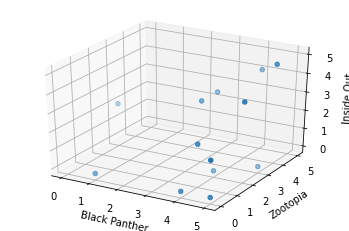

In [21]:
x = 0
y = 1
z = 2

our_fig2 = plt.figure()
ax = our_fig2.add_subplot(111, projection='3d')
ax.scatter(our_data[:,x], our_data[:,y], our_data[:,z])
ax.set_xlabel(our_films[x])
ax.set_ylabel(our_films[y])
ax.set_zlabel(our_films[z])
plt.show()

Pick three movies that you have seen. Find the distance between yourself and every other person who has seen all three movies using the generalized version of the Pythagorean Theorem from the toy problem. In terms of these three movies, which three students are most similar to you? Who is most different? A small modification of your "two movie comparison" code should suffice here. Copy / paste is a coder's best friend!

In [22]:
movies = [0, 6, 9]     #Specify the three movies
dist3d = np.zeros(len(our_data))    #Create a vector (list) of zeros to store our distances
for i in np.arange(len(our_data)):   # For all users in our_data (runs through the rows, where len(our_data) 
                                     # gives the total number of rows - that is, the length of the dataset)
    dist3d[i] = np.sqrt(sum((our_data[12, movies] - our_data[i, movies])**2))   #Calculates the distance between 
                #Myself (user 12) and each other user for movies 1, 2, and 3.
    if np.any(our_data[i,movies] == 0):   
        #Now, if a user doesn't rank one or more of the three movies, indicating that they haven't seen that               movie:
        dist3d[i] = 'NaN'      #replace distance with 'not available', so I only get distances to others who have                                 seen both movies.
print(dist3d)   #Show the output

[       nan        nan        nan 3.                nan 3.60555128
        nan        nan        nan 1.41421356        nan        nan
 0.        ]


In [23]:
# Calculate your distances here
# which thing do you need to change to change who you are comparing to?
#distance_calculated = np.sqrt(sum((our_data[your_number,movies] - our_data[0,movies])**2))
#print(distance_calculated)

Note that the code above is very similar to my `dist2d` calculations. I streamlined the movie selection by using `movies` instead of specifying each movie individually, and used the numpy command `any` to check if any of a user's ratings were zero for the three selected movies. If any of them were equal to zero, I again replaced their distance with `NaN` to reflect that they had an unknown value.

## Distance with Missing Data

We would like a way to compute the total distance between two users. If everyone had viewed every movie, we could use something like the Pythagorean theorem to compute distances. But since there are some cases of missing data, we'll make use of a distance function that automatically ignores missing data!

The reason for this is that Euclidean distance (Pythagorean theorem in 2D) depends on the magnitude of the values. It will treat our zeros, or missing data, as true coordinates, which can really throw off a distance calculation. 

Instead, we will use cosine similarity, which measures distance in terms of direction - that is, if we build a line between the origin (0,0) and a point, and do the same for a second point, what is the cosine of the angle between those lines? In other words, are the two points going in roughly the same direction or not? This measure of distance depends far less on magnitude, and so will be less affected by the zeros that we've used to represent missing data.

In [24]:
def movie_distance(x,compare):
    # computes the distance between someone "x" who scores each movie and all the people stored in a comparison
    # table "compare"
    
    distances = np.zeros(len(compare)) # create a list where we will save the distance between user x and each person
    # len(compare) gives me the length, or number of rows, in my `compare` dataset.
    for i in np.arange(len(compare)): # for each person in the compare chart
        distances[i] = sp.cosine(x,compare[i,:]) # calculate the distance using cosine similarity 
                                                    # between person x and the current person i
    return distances            #print the distances between user x and all other users. 

Note that `np.arange(len(compare))` says that, if I had a datset with 10 movie critics, my output of `len(compare) = 10`. Then, `np.arange(len(compare))` returns an array of whole numbers going from 0 to 9 - it has the appropriate number of rows and will index properly with Python to loop through the users, or critics.  

Using this script, you can calculate the distance between you and every other student. Who are the three people with preferences most similar to yours? Who are the three people with preferences the least similar to yours? The cell below calculates this for the toy data. Modify it for your uses! Record your answers in a markdown cell.

In [25]:
movie_distance(our_data[12,:],our_data)

array([0.48690232, 0.28979314, 0.21602312, 0.32063378, 0.34615385,
       0.11563414, 0.27186196, 0.50970966, 0.24324311, 0.23492222,
       0.32339813, 0.54289625, 0.        ])

Lastly, I've written a little script to take a new users preferences and locate the k members of the dataset who are most similar to them! Think about how we might use this to make recommendations.

In [26]:
def k_nearest(x,compare,k):
    distances = movie_distance(x,compare)   #Calculate distances between user x and all other users in compare
    return distances.argsort()[:k]          #.argsort returns the indices that sorts an array - so, it returns the indices
                                           # in order of smallest to largest values. With [:k], we take the first k indices

Use this to get the four nearest neighbors to myself (user 12) in movie ratings. This will return myself as a nearest neighbor, since the distance to myself is zero, so I am effectively getting the top three nearest neighbors.

In [27]:
k_nearest(our_data[12,:], our_data, 4)

array([12,  5,  2,  9], dtype=int32)

Users 5, 2, and 9 have the closest movie preferences to me, according to their distance from my own movie ratings!

Use this to confirm the three people with preferences most similar to yours!

## The k-Nearest Neighbor Algorithm

We are going to use the k-nearest neighbor (k-NN) algorithm to guess the scores people would give to movies they haven't seen. The way it works is very simple. First, consider k-NN classification. In this case, we are interested in classifying data into separate categories.

### Identifying arable land


Consider the dataset saved and plotted below. Each point corresponds to an acre of land in the plotted region. Surveyors have investigated these plots and identifed whether they are _arable_ (green) or _not arable_ (red). The production potential for a parcel land factors strongly into its value. We want to write a machine learning algorithm to guess whether some new parcel of land is arable or not.

This is an example of _supervised learning_. That means we are trying to classify data into separate known classes. Our training set is _labeled_, meaning we identify the classes of the training set data. We hope to use the training set data to help us assign testing data into one of the classes.

In [28]:
arable = pd.read_csv("arable.csv",header=None)
arable = arable.values      #Gives me a list without headers of the values within my arable csv file
non_arable = pd.read_csv("non_arable.csv",header=None)
non_arable = non_arable.values    #Returns a list without headers

all_points = np.concatenate((arable,non_arable)) # puts the arable and non-arable points in one big list
green_points = len(arable) # indicates which index is the point where they switch from arable to non-arable

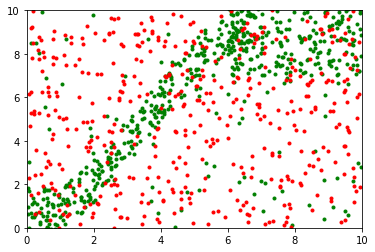

In [29]:
farm1,farm1_ax = plt.subplots() #Initialize plot
plt.plot(arable[:,0],arable[:,1],'g.') #Plot arable datapoints in green
plt.plot(non_arable[:,0],non_arable[:,1],'r.') #Plot nonarable datapoints in red
plt.axis([0,10,0,10]); #Set axis limits

For a given new testing point, how could we guess whether it is arable (green) or non-arable (red)?

In [30]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a col

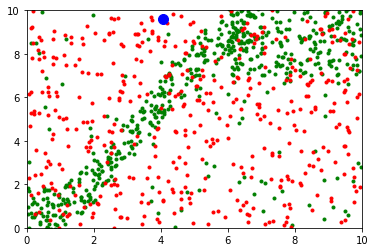

In [31]:
farm2, farm2_ax = plt.subplots()        #Initialize plot
plt.plot(arable[:,0],arable[:,1],'g.')     #Plot arable datapoints in green
plt.plot(non_arable[:,0],non_arable[:,1],'r.')     #Plot nonarable datapoints in red
plt.plot(10*np.random.rand(1,1),10*np.random.rand(1,1),'b.',markersize=20)     #Generate a random coordinate pair whose 
        #x- and y-values are between 0 and 10. Plot in blue with a larger markersize
plt.axis([0,10,0,10]);

Note that `10*np.random.rand(1,1)` tells me to generate 1 random number (the second 1) between 0 and 1 (the first 1), then multiply that number by 10.

The k-NN algorithm says, "Find the k nearest points to our point of interest. Of those k points, one of the classes has more. Assign the new point to that class."

In [32]:
def nearest_points(new_point,point_list,k):
    # calculates the k nearest points in a list to a new point
    
    distances = np.sum((point_list - new_point)**2,1) # calculate the distance from the new point to each point in the dataset
    return distances.argsort()[:k] # sort the distances and return the list (indices) of the k nearest points

Execute the cells below for different values of k to see how the choices of k affects how a new point is classified. Try extremely large and extremely small values of k. You can also try entering in a specific point for the test point.

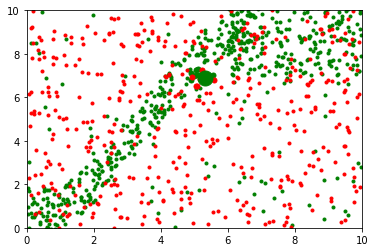

In [33]:
k = 15 # the k value we use - try a few!
#test_point = np.random.rand(1,2)*10. # randomly selects a test point
test_point = np.array([[5.32696619, 6.89016484]])     #This gives us a test point right on the border between the patch of 
                                                        # arable and nonarable land

nearby = nearest_points(test_point,all_points,k) # finds the k nearest points

# plots the data
farm4, farm4_ax = plt.subplots()
plt.plot(arable[:,0],arable[:,1],'g.')
plt.plot(non_arable[:,0],non_arable[:,1],'r.')

# now we classify the new point
arable_nearby = nearby[nearby<green_points] # how many of the nearby points are arable?
non_arable_nearby = nearby[nearby>green_points]-green_points # how many of the nearby points are non-arable?
# Because we will plot directly from the non_arable dataset, not the combined dataset, we need to subtract green_points 
# (the row number where we switch from arable to nonarable in the combined dataset) to have the appropriate indices in our 
# nonarable dataset
plt.plot(arable[arable_nearby,0],arable[arable_nearby,1],'g.',markersize=10) # plot the nearby arable points larger in green
plt.plot(non_arable[non_arable_nearby,0],non_arable[non_arable_nearby,1],'r.',markersize=10) # plot the nearby non-arable points
                                                                #larger in red

if len(arable_nearby)>len(non_arable_nearby): # if there are more nearby arable points, our test point is marked arable
    plt.plot(test_point[0,0],test_point[0,1], 'g.',markersize=30) #plot in green to classify as arable
else: # if there are more nearby non-arable points, our test point is marked non-arable
    plt.plot(test_point[0,0],test_point[0,1], 'r.',markersize=30) #plot in red to classify as non-arable

plt.axis([0,10,0,10]);

### k-NN for Movie Preferences

We can also use the k-NN algorithm for quantitative values like our movie rating problem. In this case, you find the nearest neighbors (using the distance function k_nearest). We would guess your movie score to be the average movie score of your k nearest neighbors. Try filling in the blanks in the below function to create just such an algorithm. Use the cell below to test it - be sure to ask for help as needed and work with your nearest neighbors!

In [34]:
def movie_prediction(new_person,compare,which_movie,k):
    # predicts the score "new_person" would give to the movie corresponding with column "which_movie"
    # based upon comparing them to the people in "compare" using the k-NN algorithm with k comparisons.
    
    # calculate the k most similar people to the new person
    nearest_folks = nearest_points(new_person, compare, k)
    
    # gather the scores the nearby people give to the movie in question
    nearest_folks_scores = compare[nearest_folks, which_movie]
    
    # the line below eliminates the scores of your neighbors who have also not seen the movie
    nearest_folks_scores = nearest_folks_scores[nearest_folks_scores != 0]
    
    # calculate the average of the remaining scores
    return nearest_folks_scores.mean()
    #could also do: return np.mean(nearest_folks_scores)

Here is an example using the toy data. Run it to test that your code works. For your project, you will work with our classroom data!

This is calculating Carlette's (user 4) estimated ranking of Avengers: Endgame (movie 1) based on the 'four' nearest neighbors. Note that it will effectively be three, as Carlette will be one of the nearest neighbors and therefore she will be removed when we eliminate neighbors who haven't seen the movie.

In [35]:
movie_prediction(data[4,:],data, 1, 4)

3.0

# Classification Project -- k-nearest neighbors

We now have the tools we need to answer the first part of the project on classification. After setting up your group notebook following the instructions given in the introduction of the project and 'question' 1, begin answering question 2:

2. Use the k-nearest neighbors algorithm to predict the scores every student would give to every film that they haven't seen. The final result of this problem should be an array similar to `our_data` that does not have *any* zero entries in it.

   (a) You **must** comment upon the choice of *k*. What value of *k* did you use and why?

   (b) You may use the k-nearest neighbors algorithm to find the *k* most similar *people* to a given person and use that to make your predictions, or you may find the *k* most similar *movies* to a particular movie and use that for your predictions. If you do both and comment upon the differences, you will receive extra credit.

Hint: suppose person 3 has not seen movie 5. We could update their score for that movie with this line: 
    `our_data[3,5] = ...`
    where the right hand side calculates the predicted score person 3 will give to movie 5.